# #Data Pre-processing

In [1]:
!pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Install seaborn if not already installed
!pip install seaborn

# Set the font family to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
# Set the default text color to black
plt.rcParams["text.color"] = "black"

In [2]:
#File Import from drive

from google.colab import drive
drive.mount('/content/drive')
Fiber="/content/drive/MyDrive/ML Research/ML Fiber Flexure/Fiber Flexural Strength.xlsx"
df=pd.read_excel(Fiber)
df.head(10)

Mounted at /content/drive


,W/C \nRatio,Amount of Coarse \nAggregate \n,Amount of Fine \nAggregate\n,Admixture provided,% of Fiber,Fiber Type,Aspect Ratio (l/d),Fiber tensile strength,Flexural Strength (Mpa)
0,0.36,1.497717,2.367580,1,0.0,0,0.0,0.0,5.94
1,0.36,1.486301,2.349315,1,0.5,3,45.0,1250.0,6.14
2,0.36,1.474886,2.331050,1,1.0,3,45.0,1250.0,6.32
3,0.36,1.463470,2.317352,1,1.5,3,45.0,1250.0,7.75
4,0.36,1.486301,2.349315,1,0.5,3,65.0,1000.0,6.24
5,0.36,1.474886,2.331050,1,1.0,3,65.0,1000.0,8.08
6,0.36,1.463470,2.317352,1,1.5,3,65.0,1000.0,9.33
7,0.36,1.486301,2.349315,1,0.5,3,80.0,1200.0,6.42
8,0.36,1.474886,2.331050,1,1.0,3,80.0,1200.0,9.74
9,0.36,1.463470,2.317352,1,1.5,3,80.0,1200.0,10.76


In [3]:
df.head()

,W/C \nRatio,Amount of Coarse \nAggregate \n,Amount of Fine \nAggregate\n,Admixture provided,% of Fiber,Fiber Type,Aspect Ratio (l/d),Fiber tensile strength,Flexural Strength (Mpa)
0,0.36,1.497717,2.367580,1,0.0,0,0.0,0.0,5.94
1,0.36,1.486301,2.349315,1,0.5,3,45.0,1250.0,6.14
2,0.36,1.474886,2.331050,1,1.0,3,45.0,1250.0,6.32
3,0.36,1.463470,2.317352,1,1.5,3,45.0,1250.0,7.75
4,0.36,1.486301,2.349315,1,0.5,3,65.0,1000.0,6.24


# Data Split: X Y

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x = pd.DataFrame(x)
y = pd.DataFrame(y)
#print(x.head())
#print(y.head())

# Test_Train Split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

# Feature Scaling: Data Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
sz = StandardScaler()
x_train = sz.fit_transform(x_train)
x_test = sz.transform(x_test)
#print(x_train)
#print(x_test)

# Model Preparation

In [8]:
#Feature Count for Adjusted R2
features = list(df.columns.values)
print(features)

#Calling Adjusted R2
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

#Calling other necessary Lib
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle

#Evaluation DataFrame
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'RMSE(train)':[],
                           'R-squared (train)':[],
                           'Adj R-squared (train)':[],
                           'MAE (train)':[],
                           'RMSE (test)':[],
                           'R-squared (test)':[],
                           'Adj R-squared (test)':[],
                           'MAE(test)':[],
                           '10-Fold Cross Validation':[]})

evaluation2 = pd.DataFrame({'Model': [],
                           'Test':[],
                           '1':[],
                           '2':[],
                           '3':[],
                           '4':[],
                           '5':[],
                           '6':[],
                           '7':[],
                           '8':[],
                           '9':[],
                           '10':[],
                           'Mean':[]})

['W/C \nRatio', 'Amount of Coarse \nAggregate \n', 'Amount of Fine \nAggregate\n ', 'Admixture provided', '% of Fiber', 'Fiber Type ', 'Aspect Ratio (l/d)', 'Fiber tensile strength', 'Flexural Strength (Mpa)']


# Hyperparameter Tunning

In [9]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import mean_squared_error
#param_grid = {
    #'n_estimators': list(range(100, 110)),
    #'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
#rf_regressor = RandomForestRegressor(random_state=0)
#scoring_metric = 'neg_mean_squared_error'
#grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring=scoring_metric, n_jobs=-1)
#grid_search.fit(x_train, y_train)
#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)

In [10]:
#param_grid = {
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
#}
#rf_regressor = RandomForestRegressor(random_state=0)
#scoring_metric = 'neg_mean_squared_error'
#grid_search = GridSearchCV(
    #rf_regressor,
    #param_grid,
    #cv=5,
    #scoring=scoring_metric,
    #n_jobs=-1
#)
#grid_search.fit(x_train, y_train)
#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)

In [11]:
#param_grid = {
    #'max_features': ['auto', 'sqrt', 'log2', None],
    #'bootstrap': [True, False]
#}
#rf_regressor = RandomForestRegressor(random_state=0)
#scoring_metric = 'neg_mean_squared_error'
#grid_search = GridSearchCV(
    #rf_regressor,
    #param_grid,
    #cv=5,
    #scoring=scoring_metric,
    #n_jobs=-1
#)
#grid_search.fit(x_train, y_train)
#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)

# RF Regression

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(n_estimators= 50, min_samples_split= 2,
                           min_samples_leaf= 2, max_features= 'sqrt',  bootstrap= False)
y_train_1d = np.ravel(y_train)
y_test_1d = np.ravel(y_test)
lr.fit(x_train, y_train_1d)
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

# Training set metrics
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(lr.predict(x_train), y_train_1d)), '.3f'))
r2_train = float(format(lr.score(x_train, y_train_1d), '.3f'))
ar2_train = float(format(adjustedR2(lr.score(x_train, y_train_1d), x_train.shape[0], len(features)), '.3f'))
mae_train = float(format(metrics.mean_absolute_error(lr.predict(x_train), y_train_1d), '.3f'))

# Test set metrics
rmse_test = float(format(np.sqrt(metrics.mean_squared_error(lr.predict(x_test), y_test_1d)), '.3f'))
r2_test = float(format(lr.score(x_test, y_test_1d), '.3f'))
ar2_test = float(format(adjustedR2(lr.score(x_test, y_test_1d), x_test.shape[0], len(features)), '.3f'))
mae_test = float(format(metrics.mean_absolute_error(lr.predict(x_test), y_test_1d), '.3f'))

# Cross-validation

In [13]:
#Cross-validation on the training set
cv = float(format(cross_val_score(lr, x_train, y_train_1d, cv=10).mean(), '.3f'))

cv_train_rmse = cross_val_score(lr, x_train, y_train_1d, cv=10, scoring='neg_root_mean_squared_error')
cv_train_rmse_m = float(format(cross_val_score(lr, x_train, y_train_1d, cv=10, scoring='neg_root_mean_squared_error').mean(), '.3f'))

cv_train_r2 = cross_val_score(lr, x_train, y_train_1d, cv=10, scoring='r2')
cv_train_r2_m = float(format(cross_val_score(lr, x_train, y_train_1d, cv=10, scoring='r2').mean(), '.3f'))

cv_train_ar2 = adjustedR2(cross_val_score(lr, x_train, y_train_1d, cv=10, scoring='r2'), x_train.shape[0], len(features))
cv_train_ar2_m = adjustedR2(cross_val_score(lr, x_train, y_train_1d, cv=10, scoring='r2').mean(), x_train.shape[0], len(features))

cv_train_mae = cross_val_score(lr, x_train, y_train_1d, cv=10, scoring='neg_mean_absolute_error')
cv_train_mae_m = float(format(cross_val_score(lr, x_train, y_train_1d, cv=10, scoring='neg_mean_absolute_error').mean(), '.3f'))

# Cross-validation on the test set
cv_test_rmse = cross_val_score(lr, x_test, y_test_1d, cv=10, scoring='neg_root_mean_squared_error')
cv_test_rmse_m = float(format(cross_val_score(lr, x_test, y_test_1d, cv=10, scoring='neg_root_mean_squared_error').mean(), '.3f'))

cv_test_r2 = cross_val_score(lr, x_test, y_test_1d, cv=10, scoring='r2')
cv_test_r2_m = float(format(cross_val_score(lr, x_test, y_test_1d, cv=10, scoring='r2').mean(), '.3f'))

cv_test_ar2 = adjustedR2(cross_val_score(lr, x_test, y_test_1d, cv=10, scoring='r2'), x_test.shape[0], len(features))
cv_test_ar2_m = adjustedR2(cross_val_score(lr, x_test, y_test_1d, cv=10, scoring='r2').mean(), x_test.shape[0], len(features))

cv_test_mae = cross_val_score(lr, x_test, y_test_1d, cv=10, scoring='neg_mean_absolute_error')
cv_test_mae_m = float(format(cross_val_score(lr, x_test, y_test_1d, cv=10, scoring='neg_mean_absolute_error').mean(), '.3f'))

# Model Evaluation

In [14]:
r = evaluation2.shape[0]
evaluation2.loc[r] = ['RF','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['RF','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['RF','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['RF','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['RF','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['RF','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['RF','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['RF','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['RF','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by='10-Fold Cross Validation', ascending=False)

RF_evaluation = evaluation.sort_values(by='10-Fold Cross Validation', ascending=False)
print(RF_evaluation)

  Model       Details  RMSE(train)  R-squared (train)  Adj R-squared (train)  \
0    RF  All features        0.658              0.937                  0.935   

   MAE (train)  RMSE (test)  R-squared (test)  Adj R-squared (test)  \
0        0.415        1.382             0.743                 0.725   

   MAE(test)  10-Fold Cross Validation  
0      0.911                     0.603  


Save (serialize) the trained Linear Regression model

# Cross_Vad Predict

In [15]:
from sklearn.model_selection import cross_val_predict
from scipy.stats import pearsonr

# Cross-validation on the test set
cv_test_pred = cross_val_predict(lr, x_test, y_test, cv=10)
cv_train_pred = cross_val_predict(lr, x_train, y_train, cv=10)

# Flatten the 2D arrays to 1D
cv_test_pred_arr = cv_test_pred.ravel()
y_test_arr = y_test.values.ravel()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

# Plotting Training and Testing Set Predictions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


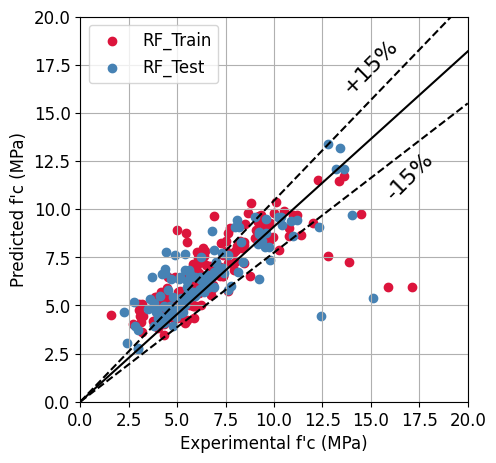

In [16]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Define the save path in Google Drive
file_path = '/content/drive/MyDrive/ML Research/ML Fiber Flexure/RF_Predict.png'

plt.figure(figsize=(5, 5))
plt.scatter(y_train, cv_train_pred, color='crimson', label='RF_Train')
plt.scatter(y_test, cv_test_pred, color='steelblue', label='RF_Test')
plt.xlabel("Experimental f'c (MPa)", fontfamily='Times New Roman', fontsize=12)
plt.ylabel("Predicted f'c (MPa)", fontfamily='Times New Roman',fontsize=12)

# Set font family for tick labels
for tick in plt.gca().get_xticklabels():
    tick.set_fontfamily('Times New Roman')
    tick.set_fontsize(12)

for tick in plt.gca().get_yticklabels():
    tick.set_fontfamily('Times New Roman')
    tick.set_fontsize(12)

# Add lines and annotations
plt.plot([0, 20], [0, 18.2], color='black', linestyle='-')  # y=x line
plt.plot([0, 20], [0, 20.9], color='black', linestyle='--')  # y=1.1x line
plt.plot([0, 20], [0, 15.5], color='black', linestyle='--')  # y=0.9x line


# Set font family for legend
legend_font = FontProperties()
legend_font.set_family('Times New Roman')
legend_font.set_size(12)
plt.legend(prop=legend_font)

# Add annotations
plt.text(15, 16, '+15%', color='black', fontsize=16, fontfamily='Times New Roman', ha='center', rotation=45)
plt.text(17, 10.5, '-15%', color='black', fontsize=16, fontfamily='Times New Roman', ha='center', rotation=45)

# Configure grid, limits, and save
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(0, 20)

plt.show()